In [1]:
%pylab inline
rc('font',**{'family':'serif'})
rc('text', usetex=True)
rc('text.latex',unicode=True)
rc('text.latex',preamble=r'\usepackage[utf8]{inputenc}')
rc('text.latex',preamble=r'\usepackage[russian]{babel}')
rcParams['figure.figsize']=(8.27,5.83)
rcParams['font.size']=16

Populating the interactive namespace from numpy and matplotlib


In [2]:
def olsim(x,y,sx,sy):
	a=0
	for i in range(3):
		w=1/(sy**2+(a*sx)**2)
		Sw=sum(w)
		ax=sum(x*w)/Sw
		ay=sum(y*w)/Sw
		axy=sum(x*y*w)/Sw
		ax2=sum((x**2+sx**2)*w)/Sw
		ay2=sum((y**2+sy**2)*w)/Sw
		a=(axy-ax*ay)/(ax2-ax*ax)
	b=(ax2*ay-ax*axy)/(ax2-ax*ax)
	n=len(x)
	chi2=sum((y-a*x-b)**2/(sy**2+(a*sx)**2))
	s02=n/(n-2)*(ay2-ay*ay-(axy-ax*ay)*(axy-ax*ay)/(ax2-ax*ax))
	sa2=s02/n/(ax2-ax*ax)
	sb2=sa2*ax2
	sa=sqrt(sa2)
	sb=sqrt(sb2)
	return a,b,sa,sb,chi2

# Part I Difraction

In [3]:
numd,ld,sld,Nd=genfromtxt("difraction.csv",delimiter=';',skip_header=1).T
len(numd)

6

In [4]:
lambd=532e-7 #cm
L=120

In [5]:
d=Nd*lambd*L/ld*1e4 #mkm
sd=d*sld/ld
print(d,sd)

[  19.84663212   39.48865979   49.74545455   79.3865285   168.51167513
  540.18461538] [ 0.10283229  0.40709959  0.32302243  0.41132916  1.71077843  6.92544379]


# Part II Microscope

In [6]:
a1,sa1=13.5,0.5 #cm
b2,sb2=33.5,0.5
a2=2.5
b1,sb1=76,0.5
Gamma=b1*b2/a1/a2
sGamma=Gamma*sqrt((sa1/a1)**2+(sb1/b1)**2+(sb2/b2)**2)
print(Gamma,sGamma)

75.43703703703703 3.05290941693


In [7]:
numm,bm,sbm,Nm=genfromtxt("microscope.csv",delimiter=';',skip_header=1).T
len(numm)

6

In [8]:
d=bm/Nm/Gamma*1e4 #mkm
sd=d*sqrt((sGamma/Gamma)**2+(sbm/bm)**2)
print(d,sd)

[  22.09347997   44.95542881   60.20473291   96.93514336  198.84131972
  583.26787117] [  0.99734173   1.90843975   2.67519338   4.25852848   9.18039538
  35.49752703]


# Part III Resolution

In [9]:
numD,D,sD=genfromtxt("Dmin.csv",delimiter=';',skip_header=1).T
len(numD)

4

In [10]:
F=11 #cm
dD=2*lambd*F/D*1e5 #mkm, D is in mm
sdD=dD*sD/D
print(dD,sdD)

[  61.6          90.03076923  167.2         390.13333333] [  1.62105263   3.46272189  11.94285714  65.02222222]


156.06069113 -22.1681743549 24.1650478123 15.392160651 0.866032586521


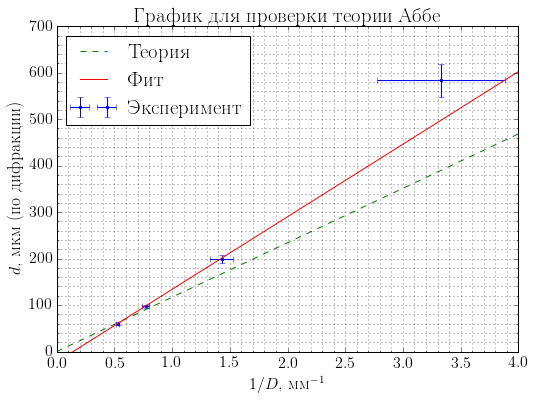

In [11]:
d1=d[2:]
sd1=sd[2:]
errorbar(1/D,d1,xerr=sD/D/D,yerr=sd1,fmt=".",label="Эксперимент")
A,B,sA,sB,chi2=olsim(1/D,d1,sD/D/D,sd1)
print(A,B,sA,sB,chi2)
arg=arange(0,4.01,0.5)
plot(arg,2*lambd*F*arg*1e5,"--",label="Теория")
plot(arg,A*arg+B,label="Фит")
axis((0,4,0,700))
xlabel("$1/D$, мм$^{-1}$")
ylabel("$d$, мкм (по дифракции)")
title("График для проверки теории Аббе")
legend(loc='upper left')
minorticks_on()
grid(which='both')
savefig("graph-abbe.pdf")